In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
df= pd.read_csv("Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [34]:
df.isna().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


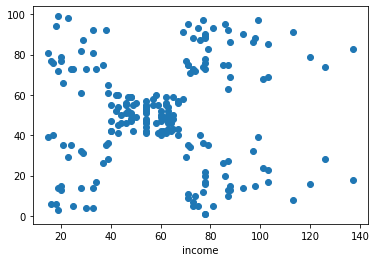

In [36]:
plt.scatter(df['Annual Income (k$)'],
           df['Spending Score (1-100)'])
plt.xlabel('income')
plt.show()

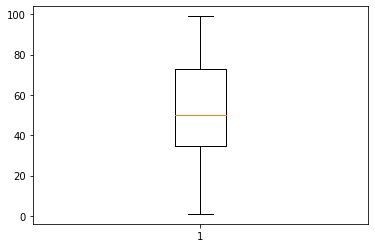

In [37]:
plt.boxplot(df['Spending Score (1-100)']);

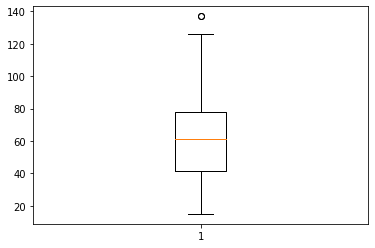

In [38]:
plt.boxplot(df['Annual Income (k$)']);

In [39]:
df.sort_values(by='Annual Income (k$)',ascending=False)

,CustomerID,Annual Income (k$),Spending Score (1-100)
199,200,137,83
198,199,137,18
197,198,126,74
196,197,126,28
195,196,120,79
...,...,...,...
5,6,17,76
2,3,16,6
3,4,16,77
1,2,15,81


In [40]:
# this is way to find outliers
q3=np.percentile(df['Annual Income (k$)'],75)
q1=np.percentile(df['Annual Income (k$)'],25)
outlier = q3+ 1.5*(q3-q1)
df[df['Annual Income (k$)']>outlier]

,CustomerID,Annual Income (k$),Spending Score (1-100)
198,199,137,18
199,200,137,83


In [41]:
new_df=df.iloc[:198,:]
# since outlier was last 2 rows remove it

In [42]:
from sklearn.cluster import KMeans

In [43]:
# model declaration
wcss=[]
k=np.arange(1,11)
for cluster in k:
    model=KMeans(cluster,random_state=123)
    model.fit(new_df.iloc[:,1:].values)
#     model.enertia_ = wcss or error rate based on no of clusters
    wcss.append(model.inertia_)
    
#     error eate enertia
# within cluster sum of square of datapoints call wcss

In [44]:
wcss

[256064.40909090906,
 171005.53409090906,
 101166.23927650377,
 68497.65525388089,
 39345.277077327715,
 33833.99905431758,
 28535.65761173335,
 23291.33634795158,
 20237.027412776355,
 17978.294717359942]

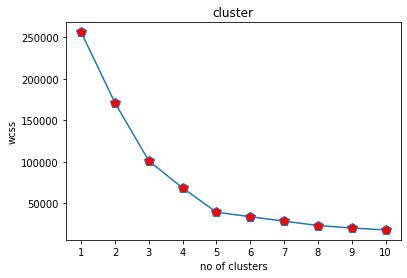

In [45]:
# plt.plot(x,y, (marker face color) mfc)
plt.plot(k,wcss, marker = 'p',mfc='r',ms=10)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.xticks(k)
plt.title("cluster")
plt.show()

In [46]:
# final _model.precit say each row ehre it is belong

In [53]:
X=new_df.iloc[:,1:].values
final_model=KMeans(n_clusters=6)
final_model.fit(X)

KMeans(n_clusters=6)

In [54]:
row_clusters=final_model.predict(X)
# predicted means means which cluster it belongs to

In [55]:
row_clusters
# row wise which cluster it belongs

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1])

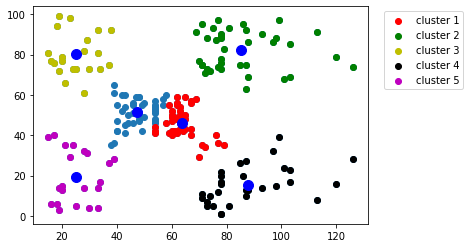

In [56]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[row_clusters==0,0],
          X[row_clusters==0,1],
          color='r',label='cluster 1')
plt.scatter(X[row_clusters==1,0],
          X[row_clusters==1,1],
          color='g',label='cluster 2')
plt.scatter(X[row_clusters==2,0],
          X[row_clusters==2,1],
          color='y',label='cluster 3')
plt.scatter(X[row_clusters==3,0],
          X[row_clusters==3,1],
          color='k',label='cluster 4')
plt.scatter(X[row_clusters==4,0],
          X[row_clusters==4,1],
          color='m',label='cluster 5')
plt.scatter(final_model.cluster_centers_[:,0],
           final_model.cluster_centers_[:,1],
           s=100,color='b')
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

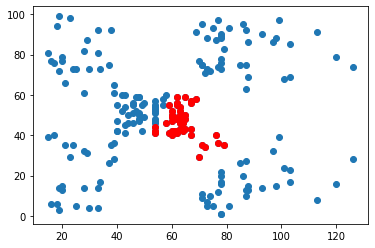

In [57]:
# clolorwise clustering visualization
plt.scatter(X[:,0],X[:,1])
# row_clusters is use for play with rows
plt.scatter(X[row_clusters==0,0],X[row_clusters==0,1],
           color='r',label='cluster 1')
plt.show()
# plt.scatter(X[row_clusters==0,0],X[row_clusters==0,1],
#            c='r',label='cluster 1')

In [58]:
final_model.cluster_centers_

array([[63.72093023, 46.1627907 ],
       [85.21052632, 82.10526316],
       [25.0952381 , 80.04761905],
       [87.87096774, 15.51612903],
       [25.14285714, 19.52380952],
       [47.29545455, 51.40909091]])